<a href="https://colab.research.google.com/github/salmaaa9/Binary-Classification-of-Heart-Disease/blob/main/BinaryClassificationOfHeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
heartDisease = pd.read_csv('/content/heart_disease_health_indicators .csv')
heartDisease.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
#Explore the datasets
def explore_dataset(dataframe):
    summary = []
    for column in dataframe.columns:
        data_type = dataframe[column].dtype
        total_count = len(dataframe[column])
        unique_count = dataframe[column].nunique()
        unique_sample = dataframe[column].unique()[0:10]
        missing_values = dataframe[column].isnull().sum()
        summary.append({'Column': column, 'Data Type': data_type, 'total count': total_count,
                        'Unique Count': unique_count, 'Unique Sample': unique_sample,
                        'Missing Values': missing_values})
    return pd.DataFrame(summary)

## Explore all dataset in one go-- make sure IDE displays maximum output with side scrolling.
datasets = [("heartDisease Dataset", heartDisease)]

for index, (dataset_name, dataset) in enumerate(datasets, start=1):
    print(f"{index}. Explore {dataset_name} dataset key details:")
    print(explore_dataset(dataset))
    print("\n")

1. Explore heartDisease Dataset dataset key details:
                  Column Data Type  total count  Unique Count  \
0   HeartDiseaseorAttack     int64       253661             2   
1                 HighBP     int64       253661             2   
2               HighChol     int64       253661             2   
3              CholCheck     int64       253661             2   
4                    BMI     int64       253661            84   
5                 Smoker     int64       253661             2   
6                 Stroke     int64       253661             2   
7               Diabetes     int64       253661             3   
8           PhysActivity     int64       253661             2   
9                 Fruits     int64       253661             2   
10               Veggies     int64       253661             2   
11     HvyAlcoholConsump     int64       253661             2   
12         AnyHealthcare     int64       253661             2   
13           NoDocbcCost     int64   

most columns are binary and ther is no missing Values

In [5]:
#identity missing values and duplicates
def check_duplicates(*datasets):
    for dataset_name, dataset in datasets:
        duplicates_count = {}

        # Check duplicates

        duplicates = dataset[dataset.duplicated()]
        duplicates_count["total"] = len(duplicates)

          # Print summary
        print(f"duplicates summary for {dataset_name}:")

        if duplicates_count["total"] == 0:
            print("No duplicates in this dataset.")
        else:
            print("Duplicates:")
            print(f" - Total duplicates: {duplicates_count['total']}")
        print()  # Add newline between each dataset summary

check_duplicates(("heartDisease Dataset", heartDisease))

duplicates summary for heartDisease Dataset:
Duplicates:
 - Total duplicates: 23899



In [8]:
heartDisease['HeartDiseaseorAttack'].value_counts()

,count
HeartDiseaseorAttack,
0,229773
1,23888


In [48]:
heartDisease.drop_duplicates(inplace=True)

In [10]:
heartDisease['HeartDiseaseorAttack'].value_counts()

,count
HeartDiseaseorAttack,
0,206050
1,23712


noticable imBalence in target values

**Train-Test-Split**

In [49]:
from imblearn.over_sampling import SMOTE

# Split into features and target
X = heartDisease.drop(columns=['HeartDiseaseorAttack'])
y = heartDisease['HeartDiseaseorAttack']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to the training data
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# y_train = y_resampled
# when i try to upscale the data the accuracy drops!!!


# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model**

In [50]:
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])
    return model

model = build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


**Train**

In [52]:
# TensorBoard callback for logging
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])

Epoch 1/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8872 - loss: 0.2894 - val_accuracy: 0.9023 - val_loss: 0.2525
Epoch 2/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8977 - loss: 0.2601 - val_accuracy: 0.9028 - val_loss: 0.2514
Epoch 3/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8994 - loss: 0.2564 - val_accuracy: 0.9024 - val_loss: 0.2517
Epoch 4/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8988 - loss: 0.2564 - val_accuracy: 0.9029 - val_loss: 0.2516
Epoch 5/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8974 - loss: 0.2586 - val_accuracy: 0.9027 - val_loss: 0.2507
Epoch 6/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8987 - loss: 0.2572 - val_accuracy: 0.9020 - val_loss: 0.2507
Epoch 7/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8975 - loss: 0.2584 - val_accuracy: 0.9023 - val_loss: 0.2510
Epoch 8/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8987 - loss: 0.

**Visualization of the Loss**

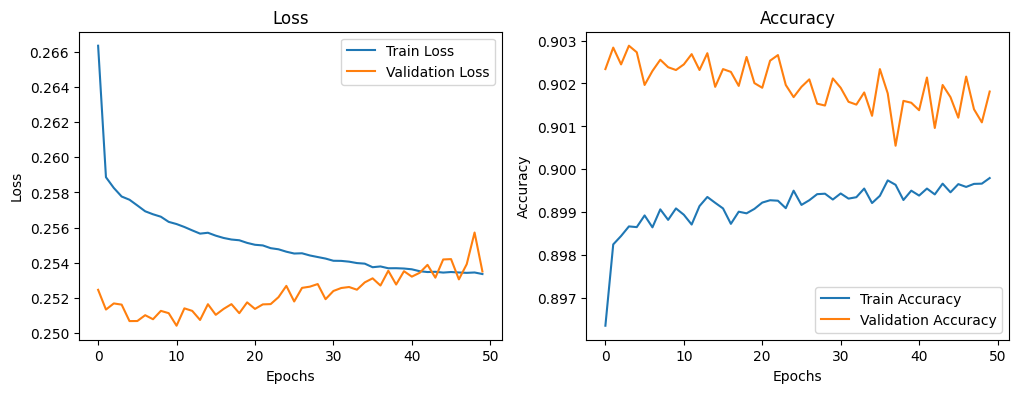

In [53]:
import matplotlib.pyplot as plt

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Evaluation**

1437/1437 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 90.18%

Confusion Matrix:
 [[41006   328]
 [ 4184   435]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     41334
           1       0.57      0.09      0.16      4619

    accuracy                           0.90     45953
   macro avg       0.74      0.54      0.55     45953
weighted avg       0.87      0.90      0.87     45953

ROC-AUC: 0.84


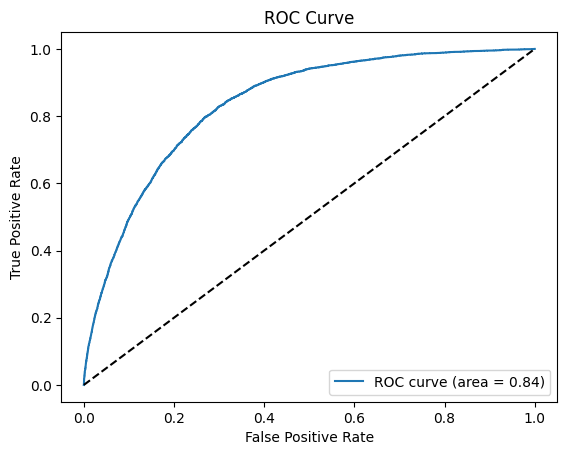

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

# Classification report: Precision, Recall, F1-Score
report = classification_report(y_test, y_pred)
print('\nClassification Report:\n', report)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC: {roc_auc:.2f}')

# ROC Curve plotting
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [56]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

def build_tuner_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=128, step=16),
                           activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=128, step=16),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = kt.RandomSearch(build_tuner_model,
                        objective='val_accuracy',
                        max_trials=5,
                        executions_per_trial=3,
                        directory='tuner_dir',
                        project_name='heart_disease')

# Perform search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


<ipython-input-57-356437c1c0a2>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
64                |64                |units
0.001             |0.001             |learning_rate

Epoch 1/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8933 - loss: 0.2732 - val_accuracy: 0.9025 - val_loss: 0.2528
Epoch 2/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8991 - loss: 0.2580 - val_accuracy: 0.9026 - val_loss: 0.2526
Epoch 3/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8985 - loss: 0.2582 - val_accuracy: 0.9030 - val_loss: 0.2512
Epoch 4/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9000 - loss: 0.2558 - val_accuracy: 0.9025 - val_loss: 0.2508
Epoch 5/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8992 - loss: 0.2569 - val_accuracy: 0.9028 - val_loss: 0.2521
Epoch 6/50
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8989 - loss: 0.2572 - val_accuracy: 0.9031 - val_loss: 0.2507
Epoch 7/50
5745/5745 ━━━━━━━━━━━━━━━━━━━